In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
bs = 48

In [4]:
path = untar_data(URLs.PETS); path

PosixPath('/home/fourmobro/.fastai/data/oxford-iiit-pet')

In [5]:
path_anno = path/'annotations'
path_img = path/'images'

In [6]:
fnames = get_image_files(path_img)

In [7]:
np.random.seed(265)
pat = r'/([^/]+)_\d+.jpg$'

In [8]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=320, bs=bs)
data.normalize(imagenet_stats)

In [9]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)
#learn.model = torch.nn.DataParallel(learn.model, device_ids=[0, 1])

In [10]:
learn.fit_one_cycle(10, max_lr=slice(.5e-3)) #orig was 1e-3

Total time: 08:59
epoch  train_loss  valid_loss  error_rate
1      1.924616    0.722814    0.136147    (01:02)
2      0.688012    0.288238    0.070116    (00:53)
3      0.388564    0.215094    0.061947    (00:52)
4      0.279903    0.191540    0.052417    (00:52)
5      0.211480    0.172528    0.053778    (00:53)
6      0.164337    0.158392    0.044929    (00:52)
7      0.135317    0.149021    0.045609    (00:52)
8      0.128036    0.149178    0.045609    (00:53)
9      0.113339    0.143138    0.042206    (00:52)
10     0.100386    0.144775    0.040163    (00:53)



In [11]:
learn.save('stage-1-r50-bs48-rs265-lr.5')

In [12]:
learn.load('stage-1-r50-bs48-rs265-lr.5')

In [13]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


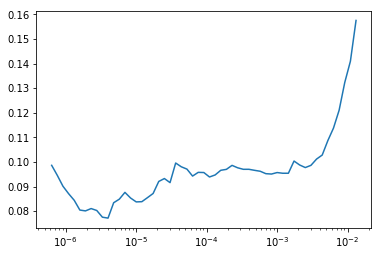

In [14]:
learn.recorder.plot()

In [15]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(5e-5, 1e-5)) #orig slice was (10e-5, 2e-5)

Total time: 11:45
epoch  train_loss  valid_loss  error_rate
1      0.102118    0.139880    0.040163    (01:13)
2      0.104570    0.154282    0.051055    (01:10)
3      0.094746    0.149310    0.044929    (01:10)
4      0.091772    0.152280    0.042886    (01:10)
5      0.078343    0.140547    0.040844    (01:10)
6      0.061453    0.135680    0.039483    (01:10)
7      0.052469    0.130720    0.038121    (01:10)
8      0.042018    0.128433    0.038802    (01:10)
9      0.038331    0.133444    0.042206    (01:10)
10     0.032859    0.129249    0.040163    (01:10)



In [16]:
learn.save('stage-2-r50-bs48-rs265-lr.5')


In [17]:
learn.load('stage-2-r50-bs48-rs265-lr.5')

In [18]:
learn.validate()

[0.12924868, 0.04016335956737085]

In [19]:
learn.load('stage-1-r50-bs48-rs265-lr.5')

In [20]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(10e-6, 5e-6)) #based upon lr graph

Total time: 11:29
epoch  train_loss  valid_loss  error_rate
1      0.094276    0.142845    0.041525    (01:08)
2      0.102145    0.142562    0.042886    (01:08)
3      0.085579    0.142537    0.040844    (01:08)
4      0.087656    0.136776    0.042886    (01:09)
5      0.082836    0.131595    0.038802    (01:09)
6      0.066779    0.135455    0.039483    (01:09)
7      0.063765    0.131316    0.039483    (01:09)
8      0.061674    0.126670    0.038121    (01:08)
9      0.056562    0.127734    0.039483    (01:09)
10     0.065623    0.131054    0.035398    (01:09)



In [21]:
learn.save('stage-3-r50-bs48-rs265-lr.5')
learn.load('stage-3-r50-bs48-rs265-lr.5')
learn.validate()

[0.13105436, 0.03539821580610282]